In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [4]:
d20 = pd.read_csv('data/latency changes/20211110T225915_20-10000-iperf.csv')
d30 = pd.read_csv('data/latency changes/20211110T224017_30-10000-iperf.csv')
d10 = pd.read_csv('data/latency changes/20211110T224018_10-10000-iperf.csv')
d40 = pd.read_csv('data/latency changes/20211110T230959_40-10000-iperf.csv')
d50 = pd.read_csv('data/latency changes/20211110T231000_50-10000-iperf.csv')
d60 = pd.read_csv('data/latency changes/20211110T232239_60-10000-iperf.csv')
d70 = pd.read_csv('data/latency changes/20211110T234226_70-10000-iperf.csv')
d80 = pd.read_csv('data/latency changes/20211110T234226_80-10000-iperf.csv')
d90 = pd.read_csv('data/latency changes/20211110T235145_90-10000-iperf.csv')
d100 = pd.read_csv('data/latency changes/20211111T000445_100-10000-iperf.csv')
d110 = pd.read_csv('data/latency changes/20211111T000446_110-10000-iperf.csv')
d120 = pd.read_csv('data/latency changes/20211111T000446_120-10000-iperf.csv')
d130 = pd.read_csv('data/latency changes/20211111T011756_130-10000-iperf.csv')
d140 = pd.read_csv('data/latency changes/20211111T011756_140-10000-iperf.csv')
d150 = pd.read_csv('data/latency changes/20211111T054500_150-10000-iperf.csv')
d160 = pd.read_csv('data/latency changes/20211111T065034_160-10000-iperf.csv')
d170 = pd.read_csv('data/latency changes/20211111T065034_170-10000-iperf.csv')
d180 = pd.read_csv('data/latency changes/20211111T065035_180-10000-iperf.csv')
d190 = pd.read_csv('data/latency changes/20211112T183303_190-10000-iperf.csv')
d200 = pd.read_csv('data/latency changes/20211112T183306_200-10000-iperf.csv')
d210 = pd.read_csv('data/latency changes/20211112T202500_210-10000-iperf.csv')

In [5]:
data_list = [d20, d30, d40, d50, d60, d70, d80, d90, d100, d110, d120, d130, d140, d150, d160, d170, d180, d190, d200, d210]
latency_list = [20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210 ]

for i in range(len(latency_list)):
    d = [int(latency_list[i]) for _ in range(data_list[i].shape[0])]
    data_list[i]['latency'] = pd.Series(d)
    data_list[i]['total_bytes'] = data_list[i]['1->2Bytes'] + data_list[i]['2->1Bytes']
    data_list[i]['total_pkts'] = data_list[i]['1->2Pkts'] + data_list[i]['2->1Pkts']

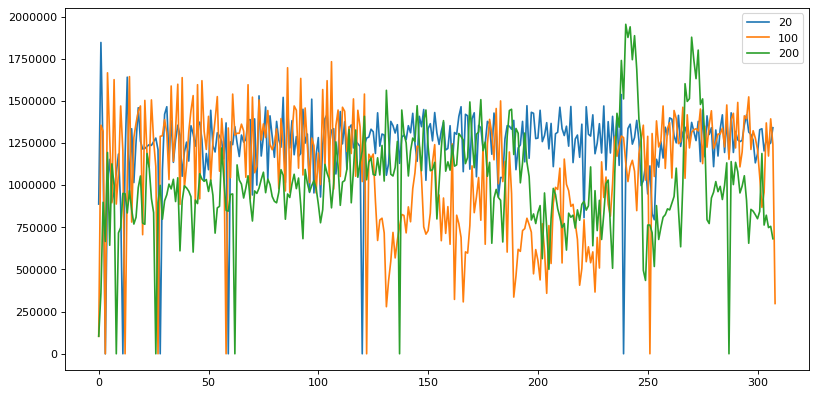

In [6]:
figure(figsize=(12, 6), dpi=80)
plt.plot(d20['1->2Bytes'], label='20')
#plt.plot(d50['1->2Bytes'])
plt.plot(d100['1->2Bytes'], label='100')
#plt.plot(d120['1->2Bytes'])
#plt.plot(d150['1->2Bytes'])
#plt.plot(d180['1->2Bytes'])
plt.plot(d200['1->2Bytes'],label='200' )
plt.legend()

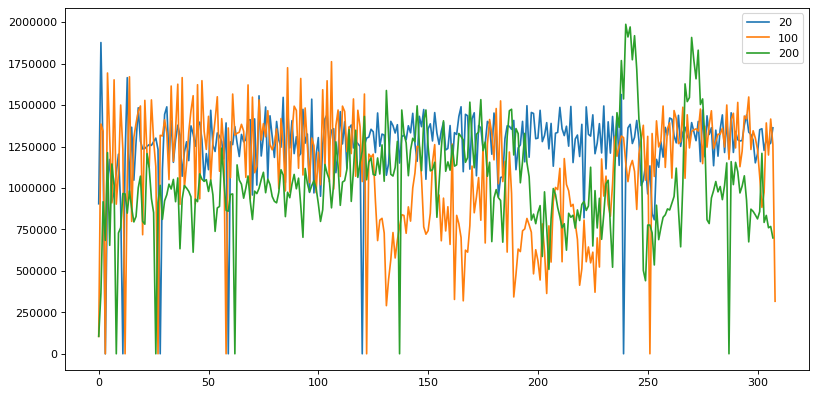

In [7]:
figure(figsize=(12, 6), dpi=80)
plt.plot(d20['total_bytes'], label='20')
plt.plot(d100['total_bytes'], label='100')
plt.plot(d200['total_bytes'],label='200' )
plt.legend()

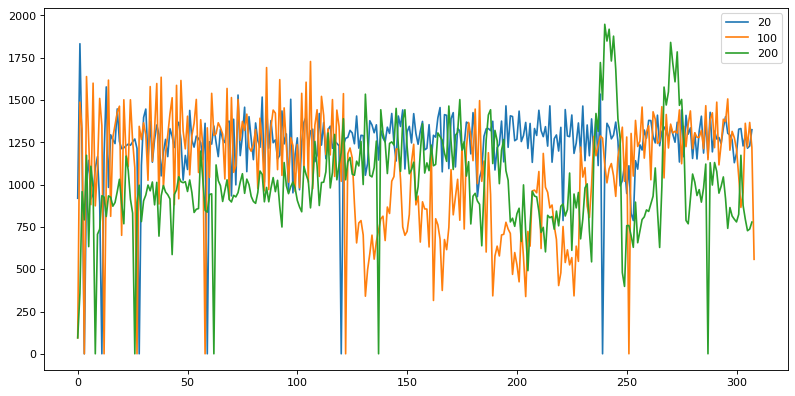

In [8]:
figure(figsize=(12, 6), dpi=80)
plt.plot(d20['total_pkts'], label='20')
plt.plot(d100['total_pkts'], label='100')
plt.plot(d200['total_pkts'],label='200' )
plt.legend()

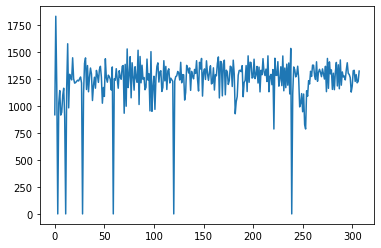

In [9]:
plt.plot(d20['total_pkts'])

In [10]:
d20

,Time,IP1,Port1,IP2,Port2,Proto,1->2Bytes,2->1Bytes,1->2Pkts,2->1Pkts,packet_times,packet_sizes,packet_dirs,latency,total_bytes,total_pkts
0,1636585155,172.22.0.3,41984,172.21.0.2,5001,6,888000,17056,592,328,1636585155604;1636585155604;1636585155604;1636...,52;1500;1500;52;1500;1500;52;1500;1500;1500;15...,2;1;1;2;1;1;2;1;1;1;1;2;1;1;1;1;2;1;1;1;1;2;1;...,20,905056,920
1,1636585156,172.22.0.3,41984,172.21.0.2,5001,6,1846500,31304,1231,602,1636585156020;1636585156020;1636585156020;1636...,52;1500;1500;52;1500;1500;52;1500;1500;52;1500...,2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;...,20,1877804,1833
2,1636585157,172.22.0.3,41984,172.21.0.2,5001,6,1173000,20696,782,398,1636585157000;1636585157000;1636585157000;1636...,52;1500;1500;52;1500;1500;52;1500;1500;52;1500...,2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;1;1;...,20,1193696,1180
3,1636585157,FE80::9CE6:25FF:FE83:8FE0,0,FF02::2,0,58,56,0,1,0,1636585157063;,56;,1;,20,56,1
4,1636585158,172.22.0.3,41984,172.21.0.2,5001,6,1030500,17732,687,341,1636585158019;1636585158020;1636585158020;1636...,52;1500;1500;52;1500;1500;52;1500;1500;52;1500...,2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;...,20,1048232,1028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,1636585452,172.22.0.3,41984,172.21.0.2,5001,6,1203000,24112,802,427,1636585452004;1636585452004;1636585452004;1636...,52;1500;1500;52;1500;1500;52;1500;1500;52;1500...,2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;...,20,1227112,1229
304,1636585453,172.22.0.3,41984,172.21.0.2,5001,6,1272000,24408,848,444,1636585453005;1636585453005;1636585453006;1636...,64;1500;64;1500;64;1500;1500;64;1500;1500;64;1...,2;1;2;1;2;1;1;2;1;1;2;1;1;2;1;1;1;2;1;1;2;1;2;...,20,1296408,1292
305,1636585454,172.22.0.3,41984,172.21.0.2,5001,6,1239000,20280,826,390,1636585454029;1636585454029;1636585454029;1636...,52;1500;1500;52;1500;1500;52;1500;1500;52;1500...,2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;...,20,1259280,1216
306,1636585455,172.22.0.3,41984,172.21.0.2,5001,6,1251000,20540,834,395,1636585455000;1636585455000;1636585455000;1636...,52;1500;1500;52;1500;1500;52;1500;1500;52;1500...,2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;...,20,1271540,1229


In [ ]:
data_list = [d20, d30, d40, d50, d60, d70, d80, d90, d100, d110, d120, d130, d140, d150, d160, d170, d180, d190, d200, d210]

In [63]:
def avg_time_delt(a):
    return pd.Series(a.split(';')[:-1]).astype(int).diff().mean()

In [100]:
#number of changes in direction in "packet_dirs"

def agg_10sec(df):
    new_df = pd.DataFrame()
    min_time = df["Time"][0]
    latency = df["latency"][0]
    while min_time < df["Time"][len(df)-1]:
        temp_df = df[(df["Time"] >= min_time) & (df["Time"] < min_time+10)]
        row = temp_df[["1->2Bytes", "2->1Bytes", "1->2Pkts", "2->1Pkts", "total_pkts", "total_bytes"]].sum().to_frame().T
        row["packet_sizes_var"] = temp_df["total_pkts"].var()
        row["avg_time_delta"] = temp_df['packet_times'].apply(avg_time_delt).mean()
        row["1->2pkts_mean"] = temp_df['1->2Pkts'].mean()
        row["Time"] = min_time
        row["latency"] = latency
        new_df = new_df.append(row)
        min_time += 10
    return new_df.reset_index(drop=True)

agg_10 = agg_10sec(d20)
agg_50 = agg_10sec(d50)
agg_100 = agg_10sec(d100)
agg_150 = agg_10sec(d150)
agg_200 = agg_10sec(d200)
agg_20  = agg_10sec(d20)
agg_30  = agg_10sec(d30)
agg_40  = agg_10sec(d40)
agg_50  = agg_10sec(d50)
agg_70  = agg_10sec(d70)
agg_90  = agg_10sec(d90)
agg_110  = agg_10sec(d110)
agg_130  = agg_10sec(d130)
agg_150  = agg_10sec(d150)
agg_170  = agg_10sec(d170)
agg_190  = agg_10sec(d190)
agg_210  = agg_10sec(d210)

In [101]:
full_df = pd.concat([agg_10, agg_50, agg_100, agg_150, agg_200, agg_20, agg_30, agg_40, agg_50, agg_70, agg_90, agg_110, agg_130, agg_150, agg_170, agg_190, agg_210])

failed features: 
    
    - "1->2pkts_max"
   
good features: 
    - "avg_time_delta"

In [96]:
def linear_regression(df):
    # Load the dataset 'packet_sizes_var', "Time"
    features = ['total_pkts', "total_bytes", 'packet_sizes_var','avg_time_delta']
    df_X = df[features]
    df_y = df['latency']

    # Split the data into training/testing sets
    X_train, X_rem, y_train, y_rem = train_test_split(df_X, df_y, train_size=0.8, random_state=42)

    X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    # The coefficients
    #print("Coefficients: \n", regr.coef_)
    
    # The mean squared error
    #print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    
    # The coefficient of determination: 1 is perfect prediction
    #print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    return r2_score(y_test.reset_index(drop=True) , y_pred), y_test.reset_index(drop=True), y_pred

In [97]:
results = []
for i in range(100):
    results.append(linear_regression(full_df))

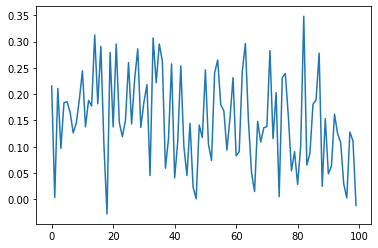

In [98]:
scores = []
for i in results:
    scores.append(i[0])
plt.plot(scores)

In [99]:
np.mean(scores)

0.15079013455931017

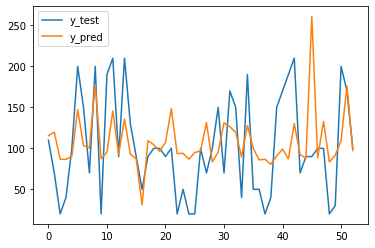

In [73]:
result = linear_regression(full_df)
plt.plot(result[1])
plt.plot(result[2])
plt.legend(["y_test", "y_pred"])

In [60]:
result

(-0.15938482840854062,
 0     100
 1      20
 2      20
 3      50
 4      50
 5     100
 6      20
 7     200
 8     150
 9      20
 10    200
 11    100
 12    150
 13    100
 14     20
 15    150
 Name: latency, dtype: int64,
 array([128.1449176 ,  86.42992464,  90.71370474,  98.1229743 ,
        109.5091245 ,  98.75614685,  99.31676838, 106.3292076 ,
        106.38964871,  94.6472406 ,  83.83031472, 204.75901874,
        113.77205643, 108.49649129,  90.14231479,  88.58463752]))

NameError: name 'y_test' is not defined